Primeiro conseguir separar a imagem por regiao onde identifica a prova e onde marca as questoes

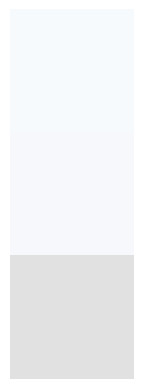

In [7]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Carregue a imagem
# image = cv2.imread('.\Leitor\provas_realizadas\scan0000.jpg')
# image_resize = cv2.resize(image, None, fx=0.5, fy=0.5)
# image_copy = cv2.resize(image, None, fx=0.5, fy=0.5)

# # Converta a imagem para tons de cinza
# gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray,(1,1),1000)
# _, thresh = cv2.threshold(blur, 195, 255, cv2.THRESH_BINARY)

# # Detecte os contornos na imagem
# contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours = sorted(contours, key=cv2.contourArea, reverse=True) 

# warped_images = []

# for contorno in contours:
#     # Obtém o retângulo delimitador do contorno
#     (x, y, w, h) = cv2.boundingRect(contorno)
    
#     # Verifica se a área é grande o suficiente (evita contornos pequenos indesejados)
#     if cv2.contourArea(contorno) > 1000:
#         # Obtém os pontos dos cantos do retângulo delimitador
#         pts1 = np.float32([[x, y], [x+w, y], [x+w, y+h], [x, y+h]])
        
#         # Define os pontos para onde a região deve ser transformada
#         pts2 = np.float32([[0, 0], [399, 0], [399, 399], [0, 399]])
        
#         # Calcula a matriz de transformação
#         M = cv2.getPerspectiveTransform(pts1, pts2)
        
#         # Aplica a transformação à região de interesse (ROI)
#         warped = cv2.warpPerspective(image_resize, M, (400, 400))
#         warped_images.append(warped)

# # Exibe as imagens transformadas
# for i, warped in enumerate(warped_images):
#     plt.plot(1, len(warped_images), i+1)
#     plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
#     plt.axis('off')

# plt.show()

# # Exibe outras imagens (se houver)
# cv2.imshow('image_resize', image_resize)
# cv2.imshow('binary_frame', thresh)
# cv2.imshow('image_copy', image_copy)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregue a imagem
image = cv2.imread('.\Leitor\provas_realizadas\scan0000.jpg')
image_resize = cv2.resize(image, None, fx=0.5, fy=0.5)
image_copy = cv2.resize(image, None, fx=0.5, fy=0.5)

# Converta a imagem para tons de cinza
gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(1,1),1000)
_, thresh = cv2.threshold(blur, 195, 255, cv2.THRESH_BINARY)

# Detecte os contornos na imagem
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True) 

cv2.drawContours(image_copy, contours, -1, (0, 0, 255), 1)


for contorno in contours:
    (x, y, w, h) = cv2.boundingRect(contorno)
    roi = image_resize[y:y+h, x:x+w]
    roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(roi_rgb)
    # so ta printando 1 contorno?
    

cv2.imshow('image_resize', image_resize)
cv2.imshow('binary_frame', thresh)
cv2.imshow('image_copy', image_copy)


cv2.waitKey(0)
cv2.destroyAllWindows()